In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [15]:
df = pd.read_csv("/Users/admin/Desktop/repo/maison-pariès/etude_client_1191.csv", index_col=0)
df

,Horodateur,Boutique,code postal,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Comment nous avez-vous connus ?,"En 2 mots, comment définiriez-vous la Maison ?",A quelle(s) occasion(s) effectuez-vous des achats chez nous,Quel est le produit que vous préférez ?,Quel est le dernier produit de la gamme Pariès que vous connaissez ?,...,Pourquoi ?.1,Que devons-nous faire pour progresser ?,"14. Dans les grandes évolutions de la consommation, quelles sont les 3 qui vous tiennent le plus à cœur ?",Sexe,Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,de combien de personnes se compose votre foyer ?,"S'il y a des enfants dans votre foyer, quel âge ont-ils ?",Êtes-vous abonné à notre newsletter ?,"Si non, confiez-moi votre adresse mail pour recevoir notre actualité (moins de 10 mails par an)"
0,2022-06-08,St Jean,31410,Depuis quelques années,visite exceptionnelle,bouche à oreille,Accueillant,pour me faire plaisir; pour régaler ma famille,Gateau basque,Je ne sais pas,...,Associé à la région,Je ne sais pas,"Alimentation durable (naturalité, moins de gas...",Femme,Retraité,65 et +,2.0,NaN,Non,NaN
1,2022-06-08,St Jean,64500,Depuis toujours,visite exceptionnelle,"avec vos parents, votre famille",Bon; Fiable,pour me faire plaisir; pour régaler ma famille...,Pâtisseries,Pâtisseries Béret basque,...,NaN,Je ne sais pas,Alimentation santé bien être et transparence,Femme,Retraité,65 et +,2.0,NaN,Non,NaN
2,2022-06-08,St Jean,62400,Depuis quelques années,visite mensuelle,par hasard en passant devant,Plaisant,pour me faire plaisir,Gateau basque chocolat,Viennoiseries Tortillon,...,NaN,Gateau basque plus épais,"Alimentation durable (naturalité, moins de gas...",Femme,Employé,25/34,2.0,NaN,Non,**********
3,2022-06-08,St Jean,33820,Depuis quelques années,visite exceptionnelle,par hasard en passant devant,Alléchant,pour me faire plaisir; pour faire un cadeau,Viennoiseries Royal Amande,Gateau basque,...,Se faire plaisir plus souvent,Gateau basque plus épais,"Alimentation durable (naturalité, moins de gas...",Homme,Retraité,50/64,2.0,NaN,Non,NaN
4,2022-06-08,St Jean,64210,Depuis quelques années,visite exceptionnelle,par hasard en passant devant; bouche à oreille,Savoureux; Raffiné,pour me faire plaisir; pour faire un cadeau,Mouchous amande,Gateau basque aux agrumes,...,NaN,Baisser les prix; Diversifier les parfums de g...,"Alimentation durable (naturalité, moins de gas...",Femme,Employé,25/34,2.0,NaN,Non,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2022-04-08,Socoa,31400,Depuis moins d'un an,visite hebdomadaire,par hasard en passant devant,Savoureux; Bon,pour me faire plaisir; pour régaler ma famille,Gateau basque,Je ne sais pas,...,NaN,Je ne sais pas,"Alimentation durable (naturalité, moins de gas...",Homme,Cadre et profession intellectuelle supérieure,35/49,4.0,"- de 5 ans, entre 5 et 10 ans",Non,NaN
1187,2022-04-08,Socoa,56100,C’est une de mes premières visites,C'est la première fois !,via les réseaux,Belle; Savoureux,pour me faire plaisir; pour faire un cadeau,NaN,NaN,...,NaN,NaN,Faire soi-même; Tradition et authenticité; Loc...,Homme,Employé,25/34,1.0,NaN,Non,NaN
1188,2022-04-08,Socoa,29200,C’est une de mes premières visites,visite exceptionnelle,"avec vos parents, votre famille; En goutant",Qualité,pour me faire plaisir,Gateau basque,NaN,...,NaN,NaN,"Alimentation durable (naturalité, moins de gas...",Femme,Etudiant,18/24,4.0,NaN,Non,NaN
1189,2022-04-08,Socoa,64700,Depuis quelques années,visite mensuelle,bouche à oreille,Tradition; Local,pour me faire plaisir; pour faire un cadeau,Espelines,Espelines,...,NaN,Rien,Alimentation santé bien être et transparence; ...,Femme,Cadre et profession intellectuelle supérieure,35/49,5.0,plus de 15 ans,Non,NaN


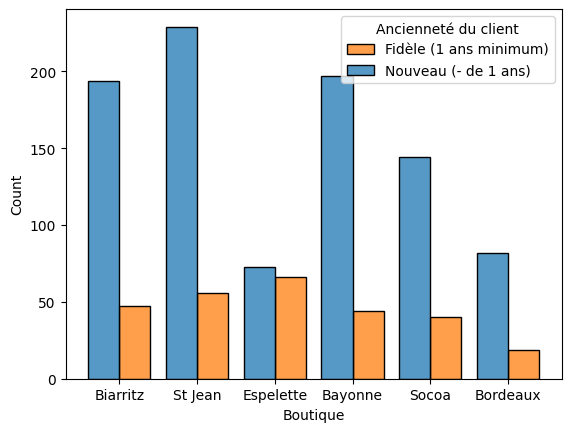

In [44]:
anciennete_converter = {"Depuis toujours" : "Client fidèle", "Depuis quelques années" : "Client fidèle", "Depuis moins d'un an" : "Nouveau client", "C’est une de mes premières visites" : "Nouveau client"}
df.replace({'Depuis combien de temps êtes vous un client de la Maison Pariès ?' : anciennete_converter}, inplace=True)
df['Depuis combien de temps êtes vous un client de la Maison Pariès ?'].unique()
sns.histplot(data=df, hue="Depuis combien de temps êtes vous un client de la Maison Pariès ?", x="Boutique", multiple="dodge", shrink=.8)
plt.legend(title='Ancienneté du client', loc='upper right', labels=['Fidèle (1 ans minimum)', 'Nouveau (- de 1 ans)'])

([0, 1], [Text(0, 0, 'Client fidèle'), Text(1, 0, 'Nouveau client')])

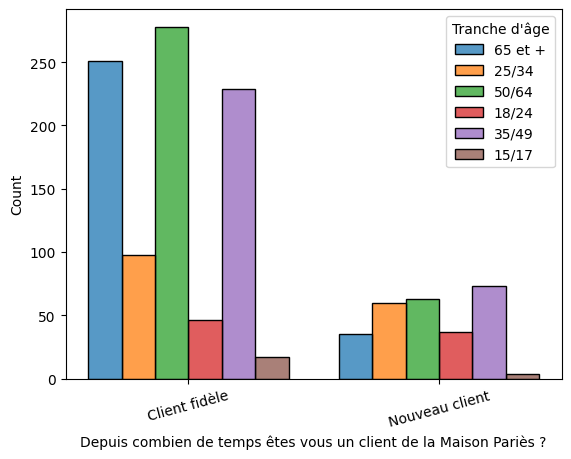

In [18]:
#df["Depuis combien de temps êtes vous un client de la Maison Pariès ?"].value_counts()
#df["Tranche d'âge"] = df["Tranche d'âge"].astype(str)
#age_converter = {"50/64":(50,64), "35/49":(35,49), "65 et +" : (65,'+'), "25/34":(25,34), '18/24':(18,24), "15/17":(15,17)}
#df = df.sort_values(by="Tranche d'âge")
sns.histplot(data=df, hue="Tranche d'âge", x="Depuis combien de temps êtes vous un client de la Maison Pariès ?", multiple="dodge", shrink=.8)
plt.xticks(rotation= 15)
#df.groupby("Tranche d'âge")

In [19]:
df_bayonne = df.loc[df['Boutique'] == 'Bayonne']
df_biarritz = df.loc[df['Boutique'] == 'Biarritz']
df_bordeaux = df.loc[df['Boutique'] == 'Bordeaux']
df_espelette = df.loc[df['Boutique'] == 'Espelette']
df_socoa = df.loc[df['Boutique'] == 'Socoa']
df_st_jean = df.loc[df['Boutique'] == 'St Jean']

dfs = {"Bayonne" : df_bayonne, "Biarritz" : df_biarritz, "Bordeaux" : df_bordeaux, "Espelette" : df_espelette, "Socoa" : df_socoa, "St Jean" : df_st_jean}

In [20]:

print(f"% de client venant du département 64 dans la boutique de Bayonne : {len(df_bayonne[df_bayonne['code postal'].str.match('^64') == True])/len(df_bayonne)*100}")
print(f"% de client venant du département 64 dans la boutique de Biarritz : {len(df_biarritz[df_biarritz['code postal'].str.match('^64') == True])/len(df_biarritz)*100}")
print(f"% de client venant du département 33 dans la boutique de Bordeaux : {len(df_bordeaux[df_bordeaux['code postal'].str.match('^33') == True])/len(df_bordeaux)*100}")
print(f"% de client venant du département 64 dans la boutique de Espelette : {len(df_espelette[df_espelette['code postal'].str.match('^64') == True])/len(df_espelette)*100}")
print(f"% de client venant du département 64 dans la boutique de Socoa : {len(df_socoa[df_socoa['code postal'].str.match('^64') == True])/len(df_socoa)*100}")
print(f"% de client venant du département 64 dans la boutique de St Jean : {len(df_st_jean[df_st_jean['code postal'].str.match('^64') == True])/len(df_st_jean)*100}")

% de client venant du département 64 dans la boutique de Bayonne : 59.33609958506224
% de client venant du département 64 dans la boutique de Biarritz : 47.30290456431535
% de client venant du département 33 dans la boutique de Bordeaux : 85.14851485148515
% de client venant du département 64 dans la boutique de Espelette : 33.093525179856115
% de client venant du département 64 dans la boutique de Socoa : 53.80434782608695
% de client venant du département 64 dans la boutique de St Jean : 36.84210526315789


In [21]:
df.columns

Index(['Horodateur', 'Boutique', 'code postal',
       'Depuis combien de temps êtes vous un client de la Maison Pariès ?',
       'A quelle fréquence venez-vous nous rendre visite ?',
       'Comment nous avez-vous connus ?',
       'En 2 mots, comment définiriez-vous la Maison ?',
       'A quelle(s) occasion(s) effectuez-vous des achats chez nous',
       'Quel est le produit que vous préférez ?',
       'Quel est le dernier produit de la gamme Pariès que vous connaissez ?',
       '8. Quels sont les produits de nos gammes que vous achetez chez d’autres artisans ?',
       'Pourquoi ?', 'Où achetez-vous nos produits ?',
       'Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?',
       'Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?',
       'Pourquoi ?.1', 'Que devons-nous faire pour progresser ?',
       '14. Dans les grandes évolutions de la consommation, quelles sont les 3 qui vous tienne

In [57]:
column = 'Pourquoi ?'
#(df[column].value_counts()/len(df)*100)
len(df[column].value_counts())

52

In [23]:
ville = "Socoa"
column = 'Comment nous avez-vous connus ?'
(dfs[ville][column].value_counts()/len(dfs[ville])*100)

bouche à oreille                                                 38.586957
par hasard en passant devant                                     27.717391
avec vos parents, votre famille                                  26.086957
Publicité                                                         1.086957
via les réseaux                                                   1.086957
En goutant                                                        1.086957
chez un restaurateur, un café, un revendeur                       1.086957
sur un guide                                                      0.543478
sur un guide; via les réseaux                                     0.543478
Location de vacances                                              0.543478
par hasard en passant devant; avec vos parents, votre famille     0.543478
bouche à oreille; Cadeau                                          0.543478
avec vos parents, votre famille; En goutant                       0.543478
Name: Comment nous avez-v

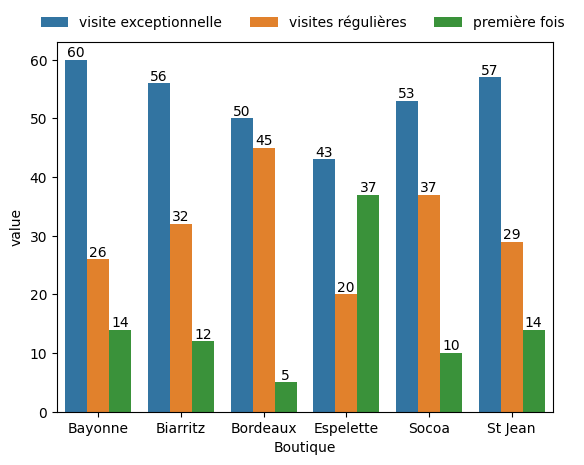

In [24]:
df_frequence = pd.DataFrame({"Boutique" : ['Bayonne', 'Bayonne','Bayonne','Biarritz','Biarritz','Biarritz','Bordeaux','Bordeaux','Bordeaux','Espelette','Espelette','Espelette','Socoa','Socoa','Socoa','St Jean','St Jean','St Jean'], 
                              "value" : [60, 26, 14, 56, 32, 12, 50, 45, 5, 43, 20, 37, 53, 37, 10, 57, 29, 14],
                              "frequence" : ["visite exceptionnelle","visites régulières","première fois ","visite exceptionnelle","visites régulières","première fois ","visite exceptionnelle","visites régulières","première fois ","visite exceptionnelle","visites régulières","première fois ","visite exceptionnelle","visites régulières","première fois ","visite exceptionnelle","visites régulières","première fois "]})

ax = sns.barplot(data=df_frequence, x="Boutique", y="value", hue="frequence")
for container in ax.containers:
    ax.bar_label(container)
sns.move_legend(ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

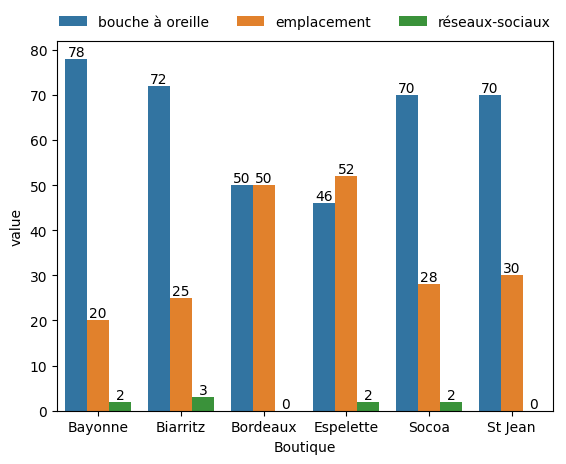

In [25]:
df_frequence = pd.DataFrame({"Boutique" : ['Bayonne', 'Bayonne','Bayonne','Biarritz','Biarritz','Biarritz','Bordeaux','Bordeaux','Bordeaux','Espelette','Espelette','Espelette','Socoa','Socoa','Socoa','St Jean','St Jean','St Jean'], 
                              "value" : [78, 20, 2, 72, 25, 3, 50, 50, 0, 46, 52, 2, 70, 28, 2, 70, 30, 0],
                              "conversion" : ["bouche à oreille","emplacement","réseaux-sociaux","bouche à oreille","emplacement","réseaux-sociaux","bouche à oreille","emplacement","réseaux-sociaux","bouche à oreille","emplacement","réseaux-sociaux","bouche à oreille","emplacement","réseaux-sociaux","bouche à oreille","emplacement","réseaux-sociaux"]})

ax = sns.barplot(data=df_frequence, x="Boutique", y="value", hue="conversion")
for container in ax.containers:
    ax.bar_label(container)
sns.move_legend(ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

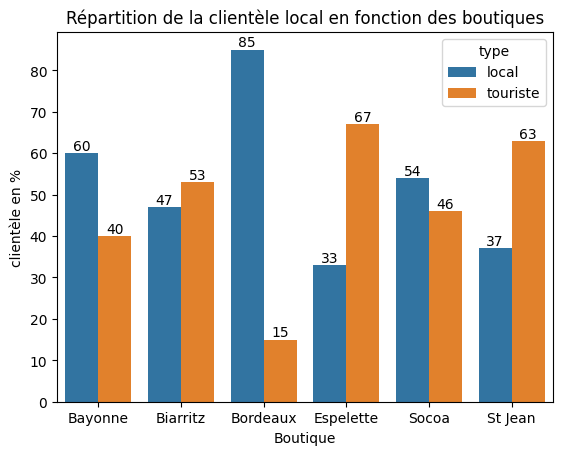

In [26]:
df_anciennete = pd.DataFrame({"Boutique" : ['Bayonne', 'Biarritz','Bordeaux','Espelette','Socoa','St Jean','Bayonne','Biarritz','Bordeaux','Espelette','Socoa','St Jean'],
                              "value" : [60, 47, 85, 33, 54, 37, 40, 53, 15, 67, 46, 63],
                              "type" : ["local","local","local","local","local","local","touriste", "touriste","touriste","touriste","touriste","touriste",]})


ax = sns.barplot(data=df_anciennete, x="Boutique", y="value", hue="type")
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("clientèle en %")
plt.title("Répartition de la clientèle local en fonction des boutiques")
plt.show()


<AxesSubplot: xlabel="Tranche d'âge", ylabel='Count'>

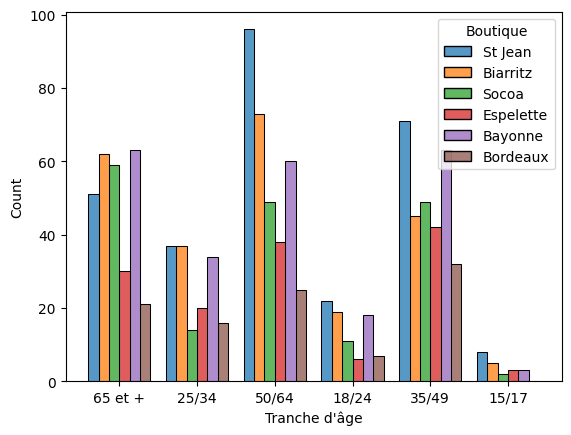

In [27]:

sns.histplot(data=df, x="Tranche d'âge", hue="Boutique", multiple="dodge", shrink=.8)

<AxesSubplot: xlabel='Boutique', ylabel='Count'>

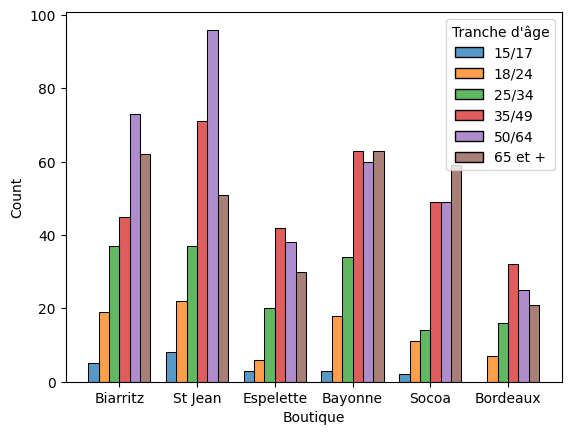

In [28]:
df.sort_values(by="Tranche d'âge", inplace=True)
sns.histplot(data=df, x="Boutique", hue="Tranche d'âge", multiple="dodge", shrink=.8)


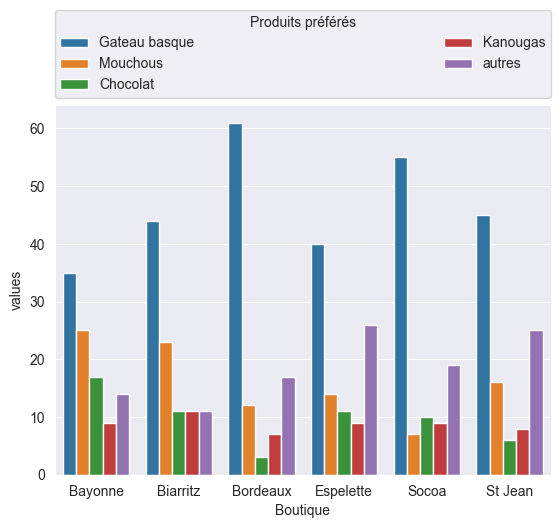

In [22]:
ville = ['Bayonne','Bayonne','Bayonne','Bayonne','Bayonne', 
         'Biarritz', 'Biarritz','Biarritz','Biarritz','Biarritz',
         'Bordeaux','Bordeaux','Bordeaux','Bordeaux','Bordeaux',
         'Espelette','Espelette','Espelette','Espelette','Espelette',
         'Socoa','Socoa','Socoa','Socoa','Socoa',
         'St Jean','St Jean','St Jean','St Jean','St Jean']

produits_préférés = ["Gateau basque", "Mouchous" , "Chocolat", "Kanougas", "autres",
          "Gateau basque", "Mouchous" , "Chocolat", "Kanougas", "autres",
          "Gateau basque", "Mouchous" , "Chocolat", "Kanougas", "autres",
          "Gateau basque", "Mouchous" , "Chocolat", "Kanougas", "autres",
          "Gateau basque", "Mouchous" , "Chocolat", "Kanougas", "autres",
          "Gateau basque", "Mouchous" , "Chocolat", "Kanougas", "autres"]

values = [35,25,17,9,14,
          44,23,11,11,11,
          61,12,3,7,17,
          40,14,11,9,26,
          55,7,10,9,19,
          45,16,6,8,25]

df_prodpref = pd.DataFrame({"Boutique": ville,
                            "values" : values,
                            "produits" : produits_préférés})

ax = sns.barplot(data=df_prodpref, x="Boutique", y="values", hue="produits")
plt.legend([],[], frameon=False)
plt.legend(title='Produits préférés',bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
#plt.ylabel("clientèle en %")
#plt.title("Répartition de la clientèle local en fonction des boutiques")
plt.show()
#df_prodpref

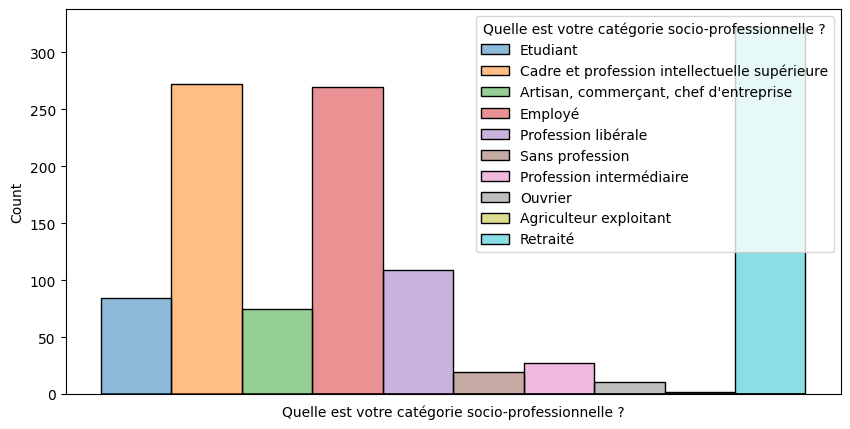

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Quelle est votre catégorie socio-professionnelle ?', hue='Quelle est votre catégorie socio-professionnelle ?')
#plt.legend(fontsize=)
ax = plt.gca()
ax.set_xticks([])
plt.show()

In [31]:
def regex_codepostal(x):
    if x[0] in [str(i) for i in range(10)]:
        return x[0:2]
    else:
        return "étranger"

df["departement"] = df['code postal'].apply(regex_codepostal)
df["departement"]

397     64
389     33
1151    69
383     78
893     64
        ..
498     64
497     64
493     64
545     64
595     64
Name: departement, Length: 1191, dtype: object

In [32]:
(df["departement"].value_counts()/len(df)*100).head(10)

64          42.821159
33          12.090680
40           5.541562
31           4.366079
75           2.602855
92           2.099076
étranger     1.931150
78           1.259446
69           1.259446
13           1.175483
Name: departement, dtype: float64

In [33]:
(df["Boutique"].value_counts()/len(df)*100).head(10)

St Jean      23.929471
Biarritz     20.235097
Bayonne      20.235097
Socoa        15.449202
Espelette    11.670865
Bordeaux      8.480269
Name: Boutique, dtype: float64

In [34]:
def regex_codepostal(x):
    if x[0] in [str(i) for i in range(10)]:
        return x[0:2]
    else:
        return "étranger"

df["departement"] = df['code postal'].apply(regex_codepostal)
df["departement"]


df_33_basque = df.loc[(df['departement']=='33') & (df['Boutique'].isin(['St Jean', 'Biarritz', 'Socoa', 'Espelette', 'Bayonne']))]
df_33_basque['Où achetez-vous nos produits ?'].value_counts()

En fonction de l'endroit où je me trouve    28
Toujours dans la même boutique              22
Name: Où achetez-vous nos produits ?, dtype: int64

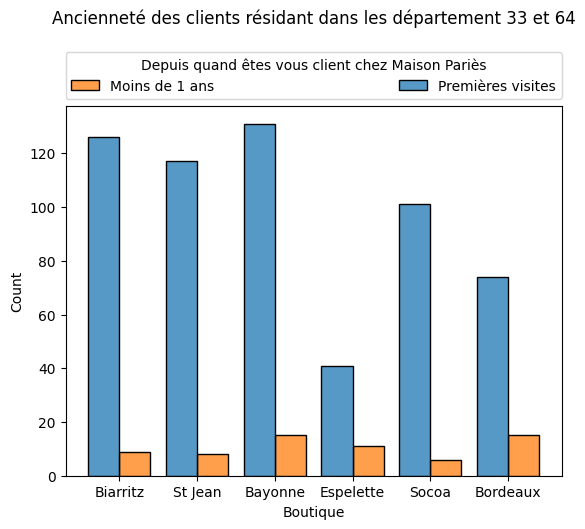

In [35]:
def regex_codepostal(x):
    if x[0] in [str(i) for i in range(10)]:
        return x[0:2]
    else:
        return "étranger"

df["departement"] = df['code postal'].apply(regex_codepostal)
df["departement"]


#anciennete_converter = {"Depuis toujours" : "Client fidèle", "Depuis quelques années" : "Client fidèle", "Depuis moins d'un an" : "Nouveau client", "C’est une de mes premières visites" : "Nouveau client"}
#df.replace({'Depuis combien de temps êtes vous un client de la Maison Pariès ?' : anciennete_converter}, inplace=True)#

df_client_33_64 = df.loc[df['departement'].isin(['33','64'])]
df_client_33_64["Depuis combien de temps êtes vous un client de la Maison Pariès ?"].value_counts()/len(df_client_33_64)*100

g = sns.histplot(data=df_client_33_64, x="Boutique", hue="Depuis combien de temps êtes vous un client de la Maison Pariès ?", multiple="dodge", shrink=.8, legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.legend(title='Depuis quand êtes vous client chez Maison Pariès', labels=["Moins de 1 ans","Premières visites","Plusieurs années","Toujours"],bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
plt.title('Ancienneté des clients résidant dans les département 33 et 64', y=1.2)
plt.show()

In [36]:
df_client_33_64["Depuis combien de temps êtes vous un client de la Maison Pariès ?"].value_counts()/len(df_client_33_64)*100

Client fidèle     90.214067
Nouveau client     9.785933
Name: Depuis combien de temps êtes vous un client de la Maison Pariès ?, dtype: float64

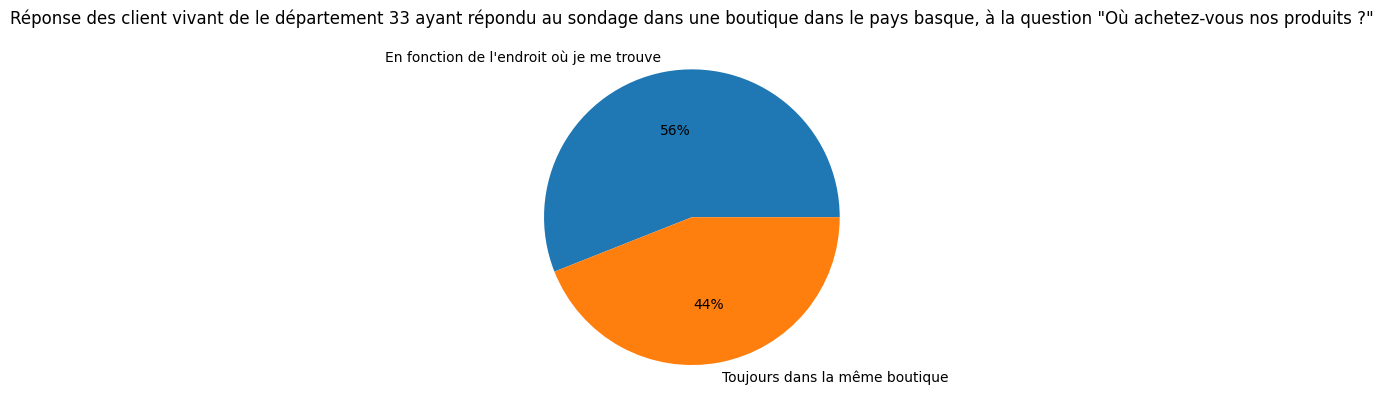

In [37]:
labels=["En fonction de l'endroit où je me trouve","Toujours dans la même boutique"]
plt.pie(df_33_basque['Où achetez-vous nos produits ?'].value_counts(), labels=labels, autopct='%.0f%%')
plt.title('Réponse des client vivant de le département 33 ayant répondu au sondage dans une boutique dans le pays basque, à la question "Où achetez-vous nos produits ?"')
plt.show()

In [38]:
ville = "Socoa"
column = "Quel est le produit que vous préférez ?"
(dfs[ville][column].value_counts()/len(dfs[ville])*100)

Gateau basque                                        28.260870
Kanougas                                              7.608696
Chocolat                                              7.608696
Gateau basque crème                                   5.978261
Mouchous                                              5.434783
Gateau basque cerise                                  4.347826
Espelines                                             4.347826
Gateau basque aux agrumes                             3.260870
Macarons                                              3.260870
Je ne sais pas                                        1.630435
Gateau basque cerise; Kanougas                        1.086957
Gateau basque noisette                                1.086957
Goxos                                                 1.086957
Gateau de voyage Paries                               1.086957
Glaces sorbet chocolat                                0.543478
Gateau basque; Mouchous                               0

In [39]:
ville = 'St Jean'
df_new = df[df['Boutique'] == ville]  

def regex_1(x):
    if re.search(";", x):
        return x.split(";")[1]
    else:
        return None
 
lambda x : x.split(";")[1] if re.search(";", x) else None   

df_produitpref = df_new[["Quel est le produit que vous préférez ?"]].dropna()
df_produitpref["2"] = df_produitpref['Quel est le produit que vous préférez ?'].apply(regex_1)

def regex_0(x):
    if re.search(";", x):
        return x.split(";")[0]
    else:
        return x

lambda x : x.split(";")[0] if re.search(";", x) else x

df_produitpref['Quel est le produit que vous préférez ?'] = df_produitpref['Quel est le produit que vous préférez ?'].apply(regex_0)    
df_produitpref


df_produitpref = df_produitpref.stack().reset_index()

total_produit_pref = df_produitpref.iloc[:,2]
(total_produit_pref.value_counts()/len(total_produit_pref)*100).head(30)

Gateau basque                         31.095406
Mouchous                              14.134276
Kanougas                               4.946996
Chocolat                               3.533569
Gateau basque cerise                   2.826855
Gateau basque crème                    2.120141
Gateau basque chocolat                 1.766784
Gateau basque aux agrumes              1.766784
Espelines                              1.766784
Gateau basque noisette                 1.766784
 Gateau basque                         1.413428
 Mouchous                              1.413428
 Espelines                             1.413428
 Kanougas                              1.413428
Pâtisseries Royal                      1.060071
 Macarons                              1.060071
Gateau de voyage                       1.060071
 Pâtisseries                           1.060071
Pâtisseries                            1.060071
Macarons                               0.706714
Viennoiseries Feuillantine             0

In [53]:
df.Boutique.unique()
df["A quelle fréquence venez-vous nous rendre visite ?"].unique()
#df["Depuis combien de temps êtes vous un client de la Maison Pariès ?"].unique()

#anciennete_converter = {"Depuis toujours" : "Client fidèle", "Depuis quelques années" : "Client fidèle", "Depuis moins d'un an" : "Nouveau client", "C’est une de mes premières visites" : "Nouveau client"}
#df.replace({'Depuis combien de temps êtes vous un client de la Maison Pariès ?' : anciennete_converter}, inplace=True)

array(['visite exceptionnelle', 'visite mensuelle',
       "C'est la première fois !", 'visite hebdomadaire',
       'visite exceptionnelle; Surtout en été', 'Tous les 15 jours',
       '3 fois par semaine', 'Tous les jours', 'Surtout en été',
       "Surtout l'été; Noël", 'Surtout l’été', 'Tous les 2 jours',
       'visite exceptionnelle, Surtout en été'], dtype=object)

In [13]:
df = df.rename(columns={'A quelle fréquence venez-vous nous rendre visite ?': 'frequence', 'Depuis combien de temps êtes vous un client de la Maison Pariès ?': 'anciennete', "Tranche d'âge" : "age", "Quel est le produit que vous préférez ?" : "produit_prefere", "Quelle est votre catégorie socio-professionnelle ?" : "socio_pro"})

fequence_converter = { "visite exceptionnelle" : "visite exceptionnel",
                      "visite mensuelle" :  "visite régulière",
                      "C'est la première fois !" : "première visite",
                      'visite hebdomadaire' : "visite régulière",
                      'visite exceptionnelle; Surtout en été' : 'visite exceptionnel',
                      'Tous les 15 jours' : "visite régulière",
                      '3 fois par semaine' : "visite régulière",
                      'Tous les jours' : "visite régulière", 
                      'Surtout en été' : "visite exceptionnel",
                      "Surtout l'été; Noël" : "visite exceptionnel",
                      'Surtout l’été' : "visite exceptionnel",
                      'visite exceptionnelle, Surtout en été' : "visite exceptionnel",
                      'Tous les 2 jours' : "visite régulière"
                      }

df = df.replace({"frequence": fequence_converter})
df['frequence'].unique()

array(['visite exceptionnel', 'visite régulière', 'première visite'],
      dtype=object)

In [39]:
df['socio_pro'].unique()

array(['Retraité', 'Employé',
       'Cadre et profession intellectuelle supérieure',
       'Profession libérale', 'Etudiant', 'Sans profession',
       "Artisan, commerçant, chef d'entreprise", 'Ouvrier',
       'Profession intermédiaire', 'Agriculteur exploitant'], dtype=object)

In [14]:
def touriste_33(x):
    if re.search("^33", x):
        return "local"
    else:
        return "touriste"
    
def touriste_64(x):
    if re.search("^64", x):
        return "local"
    else:
        return "touriste"

df_bordeaux = df[df['Boutique'] == "Bordeaux"]
df_basque = df[df['Boutique'] != "Bordeaux"]
df_bordeaux["client"] = df['code postal'].apply(touriste_33)
df_basque["client"] = df['code postal'].apply(touriste_64)
df_recons = pd.concat([df_basque,df_bordeaux])
df = df_recons

/var/folders/rw/3l7m_pl90hgbgv97f87910n00000gn/T/ipykernel_1649/2803237770.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bordeaux["client"] = df['code postal'].apply(touriste_33)
/var/folders/rw/3l7m_pl90hgbgv97f87910n00000gn/T/ipykernel_1649/2803237770.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basque["client"] = df['code postal'].apply(touriste_64)


<AxesSubplot: xlabel='Boutique', ylabel='Percent'>

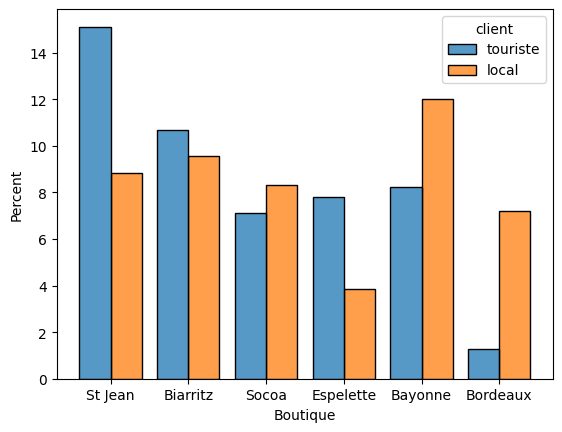

In [48]:
sns.histplot(data=df, x='Boutique', hue="client", multiple="dodge", shrink=0.8, stat="percent")

In [15]:
def basque_choco_autre(x):
    if re.search("[Bb]asque", x):
        return "Gateau Basque"
    elif re.search("choco", x):
        return 'chocolat'
    else:
        return "autre"
    
basque_choco_autre('basque')

'Gateau Basque'

In [36]:

df.dropna(subset=['produit_prefere'], inplace=True)
df['produit_prefere'].info()
df['target_produit_pref'] = df['produit_prefere'].apply(basque_choco_autre)
df['target_produit_pref'].unique()


<class 'pandas.core.series.Series'>
Int64Index: 1035 entries, 0 to 966
Series name: produit_prefere
Non-Null Count  Dtype 
--------------  ----- 
1035 non-null   object
dtypes: object(1)
memory usage: 16.2+ KB


array(['Gateau Basque', 'autre', 'chocolat'], dtype=object)

In [34]:
df['de combien de personnes se compose votre foyer ?'].astype(str).unique()


array(['2.0', '4.0', '3.0', '1.0', '5.0', '6.0', '8.0', 'nan', '7.0',
       '12.0'], dtype=object)

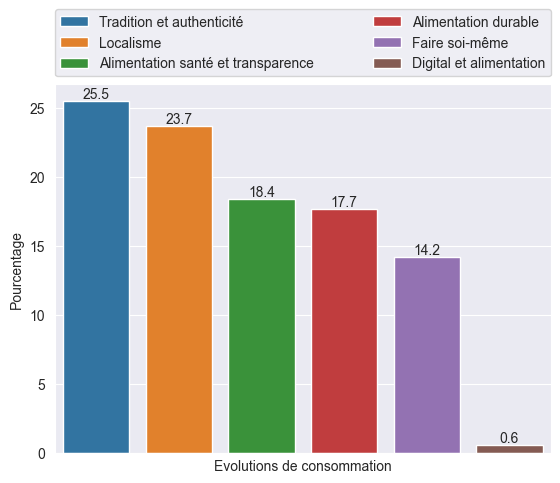

In [5]:
column = '14. Dans les grandes évolutions de la consommation, quelles sont les 3 qui vous tiennent le plus à cœur ?'
total = df[column].str.rsplit(";", n=2, expand=True).stack()
df_conso = pd.DataFrame(total)

def regex_conso(x):
    if re.search("Tradition", x):
        return "Tradition et authenticité"
    elif re.search("Localisme", x):
        return 'Localisme'
    elif re.search("durable", x):
        return 'Alimentation durable'
    elif re.search("santé", x):
        return "Alimentation santé bien être et transparence"
    elif re.search("Faire", x):
        return 'Faire soi-même'
    elif re.search("Digital", x):
        return 'Digital et alimentation'
    else:
        return None
    

df_conso.dropna(inplace=True)
df_conso['conso'] = df_conso[0].apply(regex_conso)
df_conso['conso'].value_counts()
df_conso.dropna(subset="conso", inplace=True)
df_conso_2 = df_conso[["conso"]].reset_index()
df_conso_final = df_conso_2[["conso"]]


index = ['Tradition et authenticité','Localisme','Alimentation santé et transparence','Alimentation durable','Faire soi-même','Digital et alimentation']
values = (df_conso_final.value_counts()/len(df_conso_final)*100).round(1).to_list()

df_plot = pd.DataFrame({"Evolutions de consommation" : index ,
                        "Pourcentage" : values})
sns.set_style('darkgrid')
ax = sns.barplot(data=df_plot, x="Evolutions de consommation", y='Pourcentage', hue="Evolutions de consommation", dodge=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks([])
plt.legend([],[], frameon=False)
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

In [18]:
column = '14. Dans les grandes évolutions de la consommation, quelles sont les 3 qui vous tiennent le plus à cœur ?'
total = df[column].str.rsplit(";", n=2, expand=True)
total


,0,1,2
0,"Alimentation durable (naturalité, moins de gas...",Alimentation santé bien être et transparence,Tradition et authenticité
1,Alimentation santé bien être et transparence,None,None
2,"Alimentation durable (naturalité, moins de gas...",Tradition et authenticité,"Localisme (consommation locale, circuits cour..."
3,"Alimentation durable (naturalité, moins de gas...",Tradition et authenticité,"Localisme (consommation locale, circuits cour..."
4,"Alimentation durable (naturalité, moins de gas...",Alimentation santé bien être et transparence,Faire soi-même
...,...,...,...
1186,"Alimentation durable (naturalité, moins de gas...",Tradition et authenticité,"Localisme (consommation locale, circuits cour..."
1187,Faire soi-même,Tradition et authenticité,"Localisme (consommation locale, circuits cour..."
1188,"Alimentation durable (naturalité, moins de gas...",Tradition et authenticité,Consommation économe (recherche de bonnes aff...
1189,Alimentation santé bien être et transparence,Faire soi-même,Tradition et authenticité


In [19]:
total.stack()

0     0    Alimentation durable (naturalité, moins de gas...
      1         Alimentation santé bien être et transparence
      2                            Tradition et authenticité
1     0         Alimentation santé bien être et transparence
2     0    Alimentation durable (naturalité, moins de gas...
                                 ...                        
1189  1                                       Faire soi-même
      2                            Tradition et authenticité
1190  0    Alimentation durable (naturalité, moins de gas...
      1                            Tradition et authenticité
      2     Localisme (consommation locale, circuits cour...
Length: 3437, dtype: object